https://pandas.pydata.org/pandas-docs/stable/index.html

# 결측치 처리 (missing value)

행 자체를 삭제
평균값 대체
최빈값으로 대체


In [ ]:
# NaN을 넣는 열은 float이 된다

import numpy as np
import pandas as pd

ar = np.arange(100).reshape(10,10)
df = pd.DataFrame(ar, columns = list('abcdefghij'))
df.iloc[2:5, 3:5] = np.nan
df.iloc[1:3, 1:3] = np.nan
print(df)
df.isnull().sum()

# copy() - pandas library
- Series나 DataFrame을 복사해줌
- df_null = df는 df 객체를 df_null이라는 새로운 변수에 할당하는 것이 아니라, df와 df_null이라는 변수가 같은 메모리 위치를 가리키게 됩니다. 즉, df_null이 변경되면 df도 함께 변경되는 것과 같은 효과가 발생합니다.
- 반면에 df_null = df.copy()는 df의 내용을 복제하여 새로운 메모리 위치에 저장된 df_null이라는 새로운 객체를 만듭니다. 따라서 df_null의 변경이 df에 영향을 주지 않습니다. 이러한 방법을 "깊은 복사(deep copy)"라고 합니다.
- 따라서 df_null = df.copy()를 사용하는 것이 안전합니다. 만약 df를 그대로 사용하고 싶다면, df_null = df.copy() 대신 df_null = df를 사용하는 것보다 df_null = df.copy(deep=True)를 사용하는 것이 좋습니다.

In [ ]:
df_null = df.copy()

# dropna() - pandas library
- NaN 값이 있는 해당 열을 삭제함
- axis : 제거할 대상이 행인지 열인지
- how='any' or 'all' : 결측치가 하나라도 존재하는 경우 삭제 or 모두 존재하는 경우 삭제
- subset : 제거할 대상이 되는 행 또는 열을 선택
- thresh : 유효한 값의 개수가 이 값보다 적은 행 또는 열을 제거함

## 고민
- 다른 열을 참고해서, 그룹핑 해서, 그 그룹의 평균치를 적용한다던지

In [ ]:
# 결측치 있는 행 삭제
df_null.dropna(inplace=True)
print(df_null.isnull().sum().sum())
df_null

In [ ]:
# subset (부분집합)은 삭제할 행의 열(column)을 지정하는 리스트이며, inplace는 기본값이 False이며,
# True로 설정하면 데이터프레임이 업데이트
# d열에 nan이 있는 해당 행을 다 삭제해라
# 열 자체를 삭제하려면 drop() 써야 함 -> 그런데 타이타닉은 왜 지워졌나?

df_null = df.copy()
df_null.dropna(subset=['d'], inplace=True)
# df_null = df_null.dropna(axis=1, thresh=4)
print(df_null)
df_null.isnull().sum().sum()

# fillna() - pandas library
- Series나 DataFrame에서 NaN 값을 특정 값으로 대체하는 데 사용됨
- NaN, 결측값을 다른 값으로 대체 (숫자, 문자 등)

In [ ]:
df_null.b.fillna('N', inplace=True)
df_null

# mean()
- 내장모듈인 statistics, 외부 라이브러리인 Numpy나 pandas
- stastics.mean(data)
- np.mean(data)
- pandas의 mean()은 아래 예시 참고

In [ ]:
# 결손데이터 처리하기(평균값으로 대체)

df_null = df.copy()
print(df_null)
df_null.c.mean()    # NaN을 제외한 숫자들의 평균 구해줌
df_null.c.replace(np.nan, df_null.c.mean(), inplace=True)
df_null.head()

# head() - pandas library
- Dataframe과 Series 객체에서 사용 가능
- 데이터 처음 5개 행을 보여줌

In [ ]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
titanic_df.head()

# value_counts() - pandas library
- DataFrame 또는 Series에서 각 값의 빈도수를 구해줌

In [ ]:
titanic_df.isnull().sum()

In [ ]:
# deck 열의 NaN 개수 계산하기
# (dropna=False) - default가 NaN은 제외하고 카운트해주기 때문에 NaN 갯수도 함께 알고 싶으면

nan_deck = titanic_df.deck.value_counts(dropna=False)

print(titanic_df['deck'].isnull().sum())

nan_deck

In [ ]:
titanic_df.info()

In [ ]:
# thresh = 500 : NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 698개의 NaN 값)
# how = 'any': NaN 값이 하나라도 있으면 삭제
# how = 'all': 모든 데이터가 NaN 값일 경우에만 삭제

df_thresh = titanic_df.dropna(axis=1, thresh=500)
print(df_thresh.columns)

# filterwarinings()
- warnings 모듈에서 제공

In [ ]:
# age Null 값 처리 : drop vs mean 대체

import warnings
warnings.filterwarnings('ignore')

df1 = titanic_df[['age', 'survived']]    # 컬럼 2개를 선택할 때의 방식
print(df1.age.isnull().sum())

# age NaN 값 버리기
rdf1 = df1.dropna(subset=['age'], how='all') #### how='all'이 의미가 없음...
print(rdf1.age.isnull().sum())


# age를 평균값으로 대체
print(df1.age.isnull().sum())

df1['age'].fillna(df1['age'].mean(), inplace=True)
print(df1.age.isnull().sum())

In [ ]:
rdf = titanic_df[['embarked', 'sex']]
rdf.embarked.value_counts()    #(dropna=False)

# idxmax() : pandas module or library
- DataFrame이나 Series의 해당 데이터에서 가장 큰 값을 가지는 인덱스를 반환함

In [ ]:
rdf = titanic_df[['embarked', 'sex']]
most_freq = rdf['embarked'].value_counts().idxmax()
most_freq

In [ ]:
# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 변환
# idxmax() - 가장 큰 인덱스 뽑아줌

rdf = titanic_df[['embarked', 'sex']]
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()    # dropna=True 안해줘도 됨, default 
rdf['embarked'].fillna(most_freq, inplace=True)
rdf.info()

In [ ]:
rdf.embarked.value_counts()

In [ ]:
# NumPy에서 인덱싱을 할 때,
# 조건식으로 인덱싱하면 조건식에 해당하는 요소들만 True로 반환되는 Boolean 배열이 생성됩니다.
# 이 Boolean 배열을 인덱싱에 넣으면 해당 요소만 추출됩니다.
# 따라서, ar[ar>5]에서는 5보다 큰 요소에 해당하는 True값을 가지는 Boolean 배열이 생성되고,
# 이 배열을 인덱싱에 넣으면 True에 해당하는 값만 추출됩니다.

ar = np.arange(1,10)
ar[ar>5]

In [ ]:
# 내 연습 boolean indexing에서는 괄호로 묶어 주어야 함
# & 연산자로 연결해야 함
# 형식은 titanic.age / titanic_df['age'] 둘 다 가능

# a = titanic_df[['age'] & ['alive' == 'yes']]    # list는 & X
a = titanic_df[(titanic_df['age'] == 80) & (titanic_df.alive == 'yes')]
a

In [ ]:
titanic_df.age == 80

#### 결합

In [1]:
#############################################
import numpy as np
import pandas as pd

ar = np.arange(100).reshape(10,10)
df = pd.DataFrame(ar, columns = list('abcdefghij'))
df.iloc[2:5, 3:5] = np.nan
df.iloc[1:3, 1:3] = np.nan
print(df)
df.isnull().sum()
###########################################

df_null = df.copy()

    a     b     c     d     e   f   g   h   i   j
0   0   1.0   2.0   3.0   4.0   5   6   7   8   9
1  10   NaN   NaN  13.0  14.0  15  16  17  18  19
2  20   NaN   NaN   NaN   NaN  25  26  27  28  29
3  30  31.0  32.0   NaN   NaN  35  36  37  38  39
4  40  41.0  42.0   NaN   NaN  45  46  47  48  49
5  50  51.0  52.0  53.0  54.0  55  56  57  58  59
6  60  61.0  62.0  63.0  64.0  65  66  67  68  69
7  70  71.0  72.0  73.0  74.0  75  76  77  78  79
8  80  81.0  82.0  83.0  84.0  85  86  87  88  89
9  90  91.0  92.0  93.0  94.0  95  96  97  98  99


In [2]:
df_null = df.copy()
df_a = df_null.iloc[:5]
df_b = df_null.iloc[5:]
print(df_a, '\n')
print(df_b)

    a     b     c     d     e   f   g   h   i   j
0   0   1.0   2.0   3.0   4.0   5   6   7   8   9
1  10   NaN   NaN  13.0  14.0  15  16  17  18  19
2  20   NaN   NaN   NaN   NaN  25  26  27  28  29
3  30  31.0  32.0   NaN   NaN  35  36  37  38  39
4  40  41.0  42.0   NaN   NaN  45  46  47  48  49 

    a     b     c     d     e   f   g   h   i   j
5  50  51.0  52.0  53.0  54.0  55  56  57  58  59
6  60  61.0  62.0  63.0  64.0  65  66  67  68  69
7  70  71.0  72.0  73.0  74.0  75  76  77  78  79
8  80  81.0  82.0  83.0  84.0  85  86  87  88  89
9  90  91.0  92.0  93.0  94.0  95  96  97  98  99


In [3]:
df_b.reset_index(inplace=True)
print(df_a)
df_b

    a     b     c     d     e   f   g   h   i   j
0   0   1.0   2.0   3.0   4.0   5   6   7   8   9
1  10   NaN   NaN  13.0  14.0  15  16  17  18  19
2  20   NaN   NaN   NaN   NaN  25  26  27  28  29
3  30  31.0  32.0   NaN   NaN  35  36  37  38  39
4  40  41.0  42.0   NaN   NaN  45  46  47  48  49


,index,a,b,c,d,e,f,g,h,i,j
0,5,50,51.0,52.0,53.0,54.0,55,56,57,58,59
1,6,60,61.0,62.0,63.0,64.0,65,66,67,68,69
2,7,70,71.0,72.0,73.0,74.0,75,76,77,78,79
3,8,80,81.0,82.0,83.0,84.0,85,86,87,88,89
4,9,90,91.0,92.0,93.0,94.0,95,96,97,98,99


In [4]:
df = pd.concat([df_a, df_b])
df

,a,b,c,d,e,f,g,h,i,j,index
0,0,1.0,2.0,3.0,4.0,5,6,7,8,9,NaN
1,10,NaN,NaN,13.0,14.0,15,16,17,18,19,NaN
2,20,NaN,NaN,NaN,NaN,25,26,27,28,29,NaN
3,30,31.0,32.0,NaN,NaN,35,36,37,38,39,NaN
4,40,41.0,42.0,NaN,NaN,45,46,47,48,49,NaN
0,50,51.0,52.0,53.0,54.0,55,56,57,58,59,5.0
1,60,61.0,62.0,63.0,64.0,65,66,67,68,69,6.0
2,70,71.0,72.0,73.0,74.0,75,76,77,78,79,7.0
3,80,81.0,82.0,83.0,84.0,85,86,87,88,89,8.0
4,90,91.0,92.0,93.0,94.0,95,96,97,98,99,9.0


In [5]:
# ignore_index=True을 줘서 인덱스를 재배열 - 기존 인덱스를 무시하고 합쳐진 결과에 새로운 인덱스를 생성함

df = pd.concat(([df_a, df_b]), ignore_index=True)
df = df.drop(['index'], axis=1)
df

,a,b,c,d,e,f,g,h,i,j
0,0,1.0,2.0,3.0,4.0,5,6,7,8,9
1,10,NaN,NaN,13.0,14.0,15,16,17,18,19
2,20,NaN,NaN,NaN,NaN,25,26,27,28,29
3,30,31.0,32.0,NaN,NaN,35,36,37,38,39
4,40,41.0,42.0,NaN,NaN,45,46,47,48,49
5,50,51.0,52.0,53.0,54.0,55,56,57,58,59
6,60,61.0,62.0,63.0,64.0,65,66,67,68,69
7,70,71.0,72.0,73.0,74.0,75,76,77,78,79
8,80,81.0,82.0,83.0,84.0,85,86,87,88,89
9,90,91.0,92.0,93.0,94.0,95,96,97,98,99


# merge() - pandas library
- join보다 많이 쓴다. join의 모든 기능을 merge로 할 수 있다
- on : 병합하려는 데이터프레임에서 공통적으로 가지고 있는 열의 이름이나 인덱스를 지칭하는 매개변수

In [ ]:
# merge()를 해보려고 한 행을 복사해서 값을 같게 만들어 줌

import warnings
warnings.filterwarnings('ignore')

#########################################
df_null = df.copy()
df_a = df_null.iloc[:5]
df_b = df_null.iloc[5:]
#######################################


df_b.iloc[2] = df_a.iloc[0]
print(df_a, '\n')
print(df_b)

In [ ]:
# on을 안써주면 내부적으로 겹치는거 찾음
# how 안써주면, default가 inner라 겹치는 것만 보여줌

pd.merge(df_a, df_b)

In [ ]:
# on을 써주면, 두 데이터프레임 어디 a열인지 모르기 때문에,
# 겹치는 것만 한 번 반환해주고, 나머지는 쭉 나열해 준다
# on='a'는 ket, label을 지정해 주는 것과 같음, 이 열을 참조해. 그 열의 스칼라 중에 겹치는게 있으면~
pd.merge(df_a, df_b, on='a') 

In [ ]:
# 합집합 : 어느 한쪽에만 존재하면 모든 행 반환
# outer는 공통된 것은 1번, 아닌건 다 나옴

pd.merge(df_a, df_b, how='outer')

In [ ]:
pd.merge(df_a, df_b, on='a', how='outer')

In [ ]:
# 공통적인 것은 나오고, 그 다음 10,20,30,40, 왼쪽 것만 나옴
pd.merge(df_a, df_b, how='left')

In [ ]:
pd.merge(df_a, df_b, how='right')

In [ ]:
# 교집합 : 공통적인 것만 나옴

pd.merge(df_a, df_b, how='inner')

# join() - pandas library
- merge에 비해 더 간단한 인터페이스
- 인덱스나 열을 기준으로 결합

In [6]:
print(df_a,'\n')
print(df_b)

    a     b     c     d     e   f   g   h   i   j
0   0   1.0   2.0   3.0   4.0   5   6   7   8   9
1  10   NaN   NaN  13.0  14.0  15  16  17  18  19
2  20   NaN   NaN   NaN   NaN  25  26  27  28  29
3  30  31.0  32.0   NaN   NaN  35  36  37  38  39
4  40  41.0  42.0   NaN   NaN  45  46  47  48  49 

   index   a     b     c     d     e   f   g   h   i   j
0      5  50  51.0  52.0  53.0  54.0  55  56  57  58  59
1      6  60  61.0  62.0  63.0  64.0  65  66  67  68  69
2      7  70  71.0  72.0  73.0  74.0  75  76  77  78  79
3      8  80  81.0  82.0  83.0  84.0  85  86  87  88  89
4      9  90  91.0  92.0  93.0  94.0  95  96  97  98  99


In [7]:
# 행인덱스를 기준으로 결합 (열은 merge, 단순결합은 concat)
# suffix (접미사) - 같은 이름의 열이 두 개 이상 있는 경우, 열 이름에 접미사를 추가하여 구분할 수 있음
# (열 이름 충돌 방지, 결과 데이터프레임의 가독성 높임)
# 여기에서 index가 df_b는 5-9까지라 df_a의 0~4와는 겹치는 index가 없어서 NaN이 나온 것 같음

df_a.join(df_b,lsuffix='_a',rsuffix='_b')

,a_a,b_a,c_a,d_a,e_a,f_a,g_a,h_a,i_a,j_a,...,a_b,b_b,c_b,d_b,e_b,f_b,g_b,h_b,i_b,j_b
0,0,1.0,2.0,3.0,4.0,5,6,7,8,9,...,50,51.0,52.0,53.0,54.0,55,56,57,58,59
1,10,NaN,NaN,13.0,14.0,15,16,17,18,19,...,60,61.0,62.0,63.0,64.0,65,66,67,68,69
2,20,NaN,NaN,NaN,NaN,25,26,27,28,29,...,70,71.0,72.0,73.0,74.0,75,76,77,78,79
3,30,31.0,32.0,NaN,NaN,35,36,37,38,39,...,80,81.0,82.0,83.0,84.0,85,86,87,88,89
4,40,41.0,42.0,NaN,NaN,45,46,47,48,49,...,90,91.0,92.0,93.0,94.0,95,96,97,98,99


In [ ]:
df_a.join(df_b,lsuffix='_a',rsuffix='_b', how='right')

In [ ]:
df_a.join(df_b,lsuffix='_a',rsuffix='_b', how='inner')

In [ ]:
df_a.join(df_b,lsuffix='_a',rsuffix='_b', how='outer')

# 결측치 처리

# 범주화 할 것
pclass와 deck은 이미 값이 범주화돼 있음

age, fare - 나머지는 필요 없거나 되어 있음

#### 겹치는 것 (겹치거나 쓸모없는 행 삭제)
sruvived - alive (숫자값을 가진 survived 남기는게 좋을 것 같음)
pclass - class (1=First) (숫자값을 가진 pclass 남기는게 좋을 것 같음)



In [1]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_df.alone.value_counts()

In [ ]:
titanic_df.who.unique()

In [ ]:
titanic_df.who.nunique()

In [ ]:
titanic_df.isnull().sum()

In [ ]:
# 범주화 돼있음

titanic_df.pclass.value_counts()

In [ ]:
# 범주화 필요

titanic_df.age.value_counts() # dropna=False하면 NaN 값도 나옴

In [ ]:
titanic_df.who.value_counts()

In [ ]:
# 고민 필요 - null 값 많아 지우는게 나을 듯

titanic_df.deck.value_counts()

In [ ]:
titanic_df.fare.value_counts()

In [ ]:
# embarked와 embark_town 겹침

titanic_df.embark_town.value_counts()

In [ ]:
titanic_df.embarked.value_counts()

In [ ]:
# 범주화 : age, fare
# titanic_df.age부분이 x임 -> apply함 -> 람다에 x 넣고 -> 함수로 돌림

def get_category(age):
    
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

titanic_df['age_cat'] = titanic_df.age.apply(lambda x : get_category(x))
titanic_df[['age', 'age_cat']].head()

#### 과제.fare 컬럼으로부터 적절하게 범주화한 파생변수 fare_class를 생성한 후 데이터프레임을 출력하세요.

In [2]:
# NaN 값은 없음

titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
titanic_df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [4]:
titanic_df.fare.nunique()

248

In [5]:
titanic_df_sort = titanic_df.fare.unique()
np.sort(titanic_df_sort)

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [6]:
titanic_df.fare.sort_values().unique()

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

<AxesSubplot:ylabel='Frequency'>

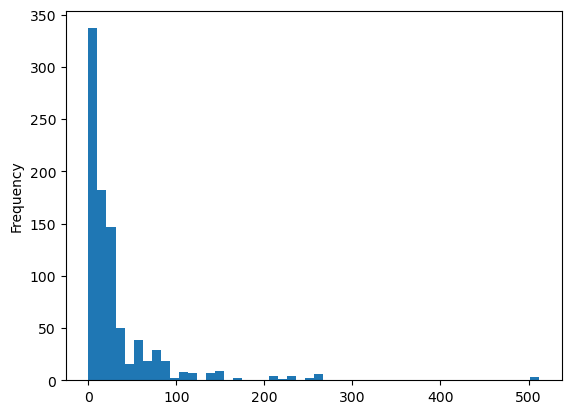

In [8]:
# histogram은 분포도이다
# 분포(distribution)는 데이터의 분포 형태를 나타내는 개념으로,
# 주어진 데이터셋에서 각 값이 나타나는 빈도수를 나타냅니다.
# 데이터가 정규분포(normal distribution)를 따르면 대부분의 데이터가 평균값 주변에 모여 있으며,
# 양 끝단에는 적은 수의 이상치(outlier)가 존재합니다.
# 반면에 균등 분포(uniform distribution)는 모든 데이터가 동일한 빈도수로 나타나는 분포입니다.

# 500 이상은 이상치(outlier)인 것 같은데, 일단 범주화이기 때문에,
# 이상치 처리같은 것은 이 부분에서는 할 필요가 없는 것 같음

# 자세히는 모르겠지만, 떨어져 있는 것끼리 묶고, 빈도수가 높은 것끼리 묶음
# 0~50
# 50~100
# 100~200
# 200~300
# 300~

titanic_df.fare.plot(kind='hist',bins=50)

In [25]:
# 분포를 확인해서 쓸 필요가 있음 : 한 쪽으로 치우침

count, bin_dividers = np.histogram(titanic_df.fare, bins=3)
print(count, '\n',bin_dividers)

bin_names = ['first', 'second', 'third']
titanic_df['fare_class'] = pd.cut(x=titanic_df.fare,
                                 bins = bin_dividers,
                                 labels = bin_names,
                                 include_lowest=True)

titanic_df.fare_class.value_counts()

[871  17   3] 
 [  0.     170.7764 341.5528 512.3292]


first     871
second     17
third       3
Name: fare_class, dtype: int64

In [15]:
titanic_df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [16]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

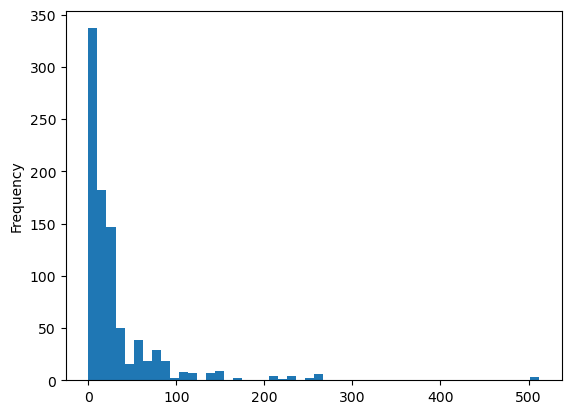

In [17]:
# 데이터가 왼쪽으로 치우쳐서 몰려 있으면, 그것 위주로 다뤄야 함

titanic_df.fare.plot(kind='hist', bins=50)

<AxesSubplot:>

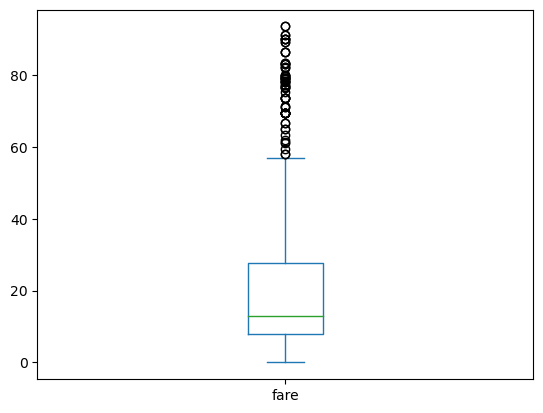

In [31]:
titanic_df.fare[titanic_df.fare<=100].plot(kind='box')

In [30]:
titanic_df.fare[titanic_df.fare<=100].describe()

count    838.000000
mean      22.411942
std       20.827218
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: fare, dtype: float64

In [34]:
# 나중에 모델 성능에 기여하는 정도를 보고 평가한다. 여러 경우로 나누고 돌려 봄

def get_category(fair):
    
    cat = ''
    if fair <= 22: cat = 'third'
    elif fair <= 100: cat = 'second'
    else : cat = 'first'
    return cat

titanic_df['fare_cat'] = titanic_df.fare.apply(lambda x : get_category(x))
titanic_df[['fare', 'fare_cat']].head()

,fare,fare_cat
0,7.2500,third
1,71.2833,second
2,7.9250,third
3,53.1000,second
4,8.0500,third


In [ ]:
# 표준편차가 높으면 정규성이 떨어짐 -> 떨어지면 정규화하는게 좋음
표준화
정규화
일반화 - 데이터 학습을 했을 때 -> 
분포가 비슷한 정도끼리 같은 카테고리로 묶는다

# replace() - pandas library

In [ ]:
# 값 치환 - replace() 리스트로 한 꺼번에 바꿔줄 수 있음

titanic_df['sex'] = titanic_df.sex.replace(['female', 'male'], ['woman', 'man']).head()
titanic_df.head()

In [ ]:
titanic_df['sex'] = titanic_df.sex.replace({'man':'male', 'woman':'female'})
titanic_df.head()

In [ ]:
# 열이름 바꾸기

tdf = titanic_df.copy()
tdf.head()

In [ ]:
tdf.rename(columns={'sex':'gender'}).head()

In [ ]:
tdf.rename(str.upper, axis='columns').head()

In [ ]:
tdf.rename(str.lower, axis='columns').head(2)

In [ ]:
tdf.embarked.unique()

In [ ]:
# 고유한 값의 개수

tdf.embarked.nunique()

# 삭제
#### drop() - pandas library
- Series나 DataFrame에서 행이나 열을 제거

In [ ]:
# 열 삭제

df_null.drop('j', axis=1, inplace=True)
df_null.head()

In [ ]:
# 여러 개의 열 삭제

df_null.drop(['g','h','i'], axis=1, inplace=True)
df_null.head()

In [ ]:
df_temp = df_null.drop('f', axis=1)
print(df_null)
df_temp.head()

In [ ]:
# 행 삭제

df_null = df.copy()
df_null

df_null.drop(df_null.index[2:5])

In [ ]:
# 열 조건에 따라 행 삭제

df_null.e.isnull().index

idx_10 = df_null[df_null.j < 10].index
print(idx_10)
df_null.drop(idx_10)

In [ ]:
# null값은 False를 반환하기 때문에 비교 연산을 할 수 없고, 그냥 .isnull()등을 사용해야 함

df_null.e.isnull()

In [ ]:
df_null[df_null.e.isnull()]

In [ ]:
df_null[df_null.e.isnull()].index

In [ ]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
titanic_df.head()

In [ ]:
tdf = titanic_df.copy()

In [ ]:
# 조건에 맞는 데이터 추출
# Q. 타이타닉 데이터셋에서 나이가 60세 이상이고 선실 등급이 1등급이며 성별이 여성인 승객 추출

tdf.head()
# con1 = tdf['pclass'] == 1
# con2 = tdf['age'] >= 60
# con3 = tdf["sex"] == 'female'
# tdf[con1 & con2 & con3]
# tdf[con1 & con2 & con3]

In [ ]:
# 나

titanic_df[(titanic_df.age >= 60) & (titanic_df.pclass == 1) & (titanic_df.sex == 'female')]

In [ ]:
tdf = titanic_df.copy()
cond = (tdf["pclass"] == 1) & (tdf["age"] >= 60) & (tdf["sex"] == "female")
tdf[cond]

In [ ]:
con1 = tdf["pclass"] == 1
con2 = tdf["age"] >= 60
con3 = tdf["sex"] == "female"
tdf[con1 & con2 & con3]

In [ ]:
tdf_m = tdf[tdf.sex == 'male']
tdf_m.head()

In [ ]:
# 'First'를 'class'와 함께 []에 넣지 말 것

tdf_f = tdf[tdf['class'] == 'First']
tdf_f.head()

In [ ]:
con1 = tdf['class'] == 'First'
con2 = tdf['sex'] == 'female'
tdf[con1&con2].survived.value_counts()

In [ ]:
con1 = tdf['class'] == 'Third'
con2 = tdf['sex'] == 'male'
tdf[con1&con2].survived.value_counts()

그룹 연산
* 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
* 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
* 그룹 객체 만들기(분할)
* 그룹 연산 메소드(적용-결합)

In [ ]:
grouped = tdf.groupby('class')
list(grouped)

In [ ]:
# 보기 좋게

for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))
    print(group.head())

In [ ]:
grouped.groups.keys()

In [ ]:
average = grouped.mean()
average

In [ ]:
stat = grouped.max()
stat

In [ ]:
# Q. 'Third' 그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.

group3 = grouped.get_group('Third')
group3.describe()

In [ ]:
# Q. class 열, sex 열을 기준으로 분할하여 grouped_two에 저장하세요.

grouped_two = tdf.groupby(['class', 'sex'])
grouped_two.mean()

In [ ]:
grouped_two = tdf.groupby(['class','sex'])
grouped_two.std()

In [ ]:
# 개연 연습

age_by_class = titanic_df.groupby('class')['age'].mean()

print(age_by_class)

적용-결합

데이터 집계(agg), 
- 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용하려면 agg() 메서드 사용
- 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
- 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})
- aggregate"는 집계하다, 모으다, 합치다, 종합하다, 총계를 내다 등의 의미를 갖는 동사입니다. 데이터 분석에서 "aggregate"는 데이터를 그룹화하여 특정 기준에 따라 합계, 평균, 최대값, 최소값 등을 계산하는 과정을 말합니다. 따라서 "aggregate"와 유사한 용어로 "집계(aggregation)", "집계함수(aggregation function)", "집계연산(aggregation operation)" 등이 사용됩니다.

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메서드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링 : group 객체.filter(조건 함수식)

객체에 함수 매핑(apply)
 - 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
 - group 객체.apply(매핑함수)
 
https://kongdols-room.tistory.com/166

Pandas의 agg 함수와 transform 함수는 모두 그룹화된 데이터에 함수를 적용하는데 사용됩니다. 
그러나 이 두 함수는 몇 가지 차이점이 있습니다.

- agg 함수는 그룹화된 데이터를 집계하여 새로운 데이터프레임을 만듭니다. 집계 함수를 사용하여 각 그룹의 결과를 새로운 열에 저장합니다. 예를 들어, mean, sum, count와 같은 함수를 사용할 수 있습니다.

- transform 함수는 그룹화된 데이터를 변경하거나 변환할 수 있습니다. 그리고 transform 함수를 사용한 결과는 원본 데이터프레임과 크기가 같습니다. 예를 들어, 그룹화된 데이터에 대한 각 열의 평균 값을 계산하고 이를 각 요소에 적용하여 새로운 열을 만들 수 있습니다.

- agg 함수를 사용하여 다른 집계 함수를 조합하여 사용할 수도 있습니다. 예를 들어, 여러 개의 열에 대한 sum과 mean 함수를 같이 사용하여 새로운 데이터프레임을 만들 수 있습니다.

In [1]:
# 데이터프레임 생성
df = pd.DataFrame({
    'group' : ['A','A','B','B','B'],
    'value' : [1,2,3,4,5]
})
print(df,'\n')
# agg 함수 사용 예시
df_agg = df.groupby('group').agg({'value' : ['mean', 'sum']})
print(df_agg,'\n')

# transform 함수 사용 예시
df_transform = df.groupby('group')['value'].transform('mean')
df['group_mean'] = df_transform
print(df)
                                  

  group  value
0     A      1
1     A      2
2     B      3
3     B      4
4     B      5 

      value    
       mean sum
group          
A       1.5   3
B       4.0  12 

  group  value  group_mean
0     A      1         1.5
1     A      2         1.5
2     B      3         4.0
3     B      4         4.0
4     B      5         4.0


In [ ]:
# Q. 최대값 - 최소값을 반환하는 사용자 함수를 정의하고 agg()함수에 인수로 전달하여 그룹별로 집계하여
# agg_minmax 이름으로 저장 후 처음 5개행을 출력하세요.
# 자동으로 숫자가 아닌 열은 제외시킴

def min_max(x):
    return x.max() - x.min()

agg_minmax = grouped.agg(min_max)
agg_minmax.head()

In [ ]:
# default = 20임, 아래 parch가 ...으로 나오길래 일단 조정했음

pd.options.display.max_columns = 30

In [ ]:
agg_all = grouped.agg(['min', 'max'])
agg_all

In [ ]:
# Q. grouped에 각 열마다 다른 함수를 적용하여 agg_sep 이름으로 저장하고 출력하세요.
# ('fare'는 'min', 'max', 'age'는 'mean')
# 딕셔너리 사용
# agg() 함수를 사용할 때, 함수 이름을 인자로 전달할 때는 괄호를 붙이지 않아도 됩니다.
# 함수 이름만 전달하면 agg() 함수가 해당 함수를 데이터에 적용할 때 괄호를 붙여서 함수를 호출합니다.

agg_sep = grouped.agg({'fare':['max', 'min'], 'age':'mean'})
agg_sep

In [2]:
# grouped가 class였고, class별 age의 평균임

# grouped_trans = grouped.age.transform('mean')
grouped_trans = grouped.age.transform('mean')
tdf['group_mean'] = grouped_trans
tdf[['class','age','group_mean']].head()

NameError: name 'grouped' is not defined

In [ ]:
list(grouped)

In [ ]:
# Q. 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여
# grouped_filter 이름으로 저장 후 처음 5개행을 출력하세요.

grouped_filter = grouped.filter(lambda x : len(x) >= 200)

# 이렇게 하면 second가 사라진 것을 볼 수 있다. second이 184 index였기 때문에
a = grouped_filter.groupby('class')
list(a)

In [ ]:
# Q. age열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후
# 끝에서 5개행을 출력하세요.

grouped_age = tdf.groupby(['age'])
age_filter = grouped_age.filter(lambda x : x.age.mean() < 30)
age_filter.tail(5)

In [ ]:
sex_grouped = titanic_df.groupby('sex')
sex_grouped.mean()

In [ ]:
titanic_df.head()

In [ ]:
# z-score를 계산하는 사용자 함수 정의
# z-score : 평균값에서 표준편차의 몇 배 떨어져 있는지를 평가하는 수치

def z_score(x):
    return ((x - x.mean())/x.std())

age_zscore = grouped.age.apply(z_score)

age_zscore.head()

피벗
* 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [ ]:
tdf.head()

In [ ]:
import pandas as pd

ptdf = pd.pivot_table(tdf, index ='class',
                     columns='sex',
                     values='survived',
                     aggfunc=['mean','sum'])

ptdf

In [ ]:
# 행, 열, 값에 서용할 열을 2개 이상 지정할 수 있다. index, values, aggfunc에 각각 2개를 지정하여 출력하세요.

pdf1 = pd.pivot_table(tdf,
                   index =['class', 'sex'],
                   columns='survived',
                   values=['age', 'fare'],
                   aggfunc=['mean','max'])

pdf1

#### 평균 vs 중앙값
- 중앙값과 평균은 데이터의 분포를 나타내는 두 가지 대표적인 값입니다. 
- 평균은 모든 데이터 값을 더한 후 개수로 나눈 값이며, 중앙값은 데이터를 크기순으로 정렬했을 때 가운데 위치한 값입니다.

- 평균과 중앙값이 같다면, 데이터의 분포가 대칭적인 경우입니다. 대칭 분포인 경우, 평균과 중앙값은 같은 값을 가지며, 데이터의 중심이 대략적으로 그 값 주변에 분포하고 있습니다.

- 대칭적이지 않은 경우, 평균과 중앙값은 서로 다른 값을 가집니다. 이때는 데이터의 분포가 한쪽으로 치우쳐져 있는 경우입니다. 예를 들어, 데이터가 오른쪽으로 치우쳐져 있을 경우, 평균은 중앙값보다 더 큰 값을 가지게 됩니다.

In [ ]:
# 중앙값과 평균의 비교 - 빈도는 1

data1 = np.array([1,2,3,4,5,100])    # 비대칭
data2 = np.array([1,2,3,3,2,1])    # 대칭
mean1 = np.mean(data1)
median1 = np.median(data1)
mean2 = np.mean(data2)
median2 = np.median(data2)
print(mean1,'\n')
print(median1,'\n')
print(mean2,'\n')
print(median2,'\n')

python, numpy, pandas 날짜 타입 비교 및 정리

- datetime은 python 설치 시 기본적으로 내장된 라이브러리로, 날짜를 쓸 것인지, 시간을 쓸 것인지, 날짜시간을 합쳐쓸 것인지에 따라 클래스가 분화되어 있는 것이 특징. 예를들어 '2021-3-16'을 표시하고 싶으면 date 클래스를 사용하고, '2021-3-16 12:34:21'를 표시하고 싶으면 'datetime' 클래스를 사용합니다. 
- 반면 datetime64나 Timestamp는 각각 numpy, pandas 라이브러리에서 새로 정의한 날짜시간 클래스입니다. 이 둘은 numpy, pandas를 설치해야만 이용할 수 있고, 한 클래스로 날짜, 시간, 날짜시간을 모두 정의할 수 있는 것이 특징
- 날짜, 시간 타입은 일반적인 정수, 실수끼리 연산할 때와 달리 단위를 가지고 있는 점 때문에 시간의 차이를 저장하는 별도의 클래스가 있다는 특징. 이를 timedelta(타임델타)라고 하는데, 날짜, 시간은 특정 시점의 시각을 표시하는 용도이고(2021년 3월 16일), 타임델타는 기간 또는 시간 차이를 표시하는 용도(5일)

Pandas로 날짜를 다루는 방법은 크게 3가지로 나눌 수 있습니다.

- 날짜 생성하기
- 날짜 범위 생성하기
- 날짜 데이터 다루기

In [ ]:
# 날짜 생성
# pandas에서의 timestampe = datetime이다. time의 timestamp와 구분할 것

import pandas as pd

date = pd.to_datetime('2002-04-02')
print(date, type(date))
date

In [ ]:
# 날짜 범위

dates = pd.date_range(start='2022-01-01', end='2022-12-31')
print(dates)

In [ ]:
# 날짜 범위

df = pd.DataFrame({'date':['2022-01-01', '2022-01-02','2022-01-03'], 'value':[1,2,3]})
df.info()
df['date'] = pd.to_datetime(df['date'])
print(df)

In [ ]:
# 위에서 datetime이 object -> datetime64로 처리해줌

df.info()

In [ ]:
import time
time.time()

In [ ]:
# 판다스 to_datetime
# 함수에서 인식할 입력값의 단위

pd.to_datetime(1680488323.5668283, unit='s')
print(date, type(date))

저의 이전 답변에서 잘못 이해하고 있었습니다. 죄송합니다.

pd.to_datetime() 함수는 tz 파라미터를 지원하지만, 주어진 타임스탬프 값이 UTC 기준이 아니라면, tz_localize() 메소드를 사용하여 먼저 로컬 타임존으로 지정해줘야 합니다.

따라서, pd.to_datetime(1680488323.5668283, unit='s', tz='Asia/Seoul') 대신에 pd.to_datetime(1680488323.5668283, unit='s').tz_localize('UTC').tz_convert('Asia/Seoul')와 같이 사용하시면 됩니다. 이렇게 변환된 시간은 DatetimeIndex 객체로 반환됩니다.

In [82]:
df = pd.read_csv('../../dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [84]:
df['New_Date'] = pd.to_datetime(df.Date)
# df['New_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [85]:
df.drop('Date', axis=1, inplace=True)

In [86]:
df['year'] = df.New_Date.dt.year
df['month'] = df.New_Date.dt.month
df['day'] = df.New_Date.dt.day
df.head()

,Close,Start,High,Low,Volume,New_Date,year,month,day
0,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [87]:
df.set_index('New_Date', inplace=True)
df.head()

,Close,Start,High,Low,Volume,year,month,day
New_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2
2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2018-06-28,10400,10900,10950,10150,155769,2018,6,28
2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [88]:
df.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='New_Date', freq=None)

In [91]:
df.loc['2018-06-29':'2018-07-02']

,Close,Start,High,Low,Volume,year,month,day
New_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2
2018-06-29,10700,10550,10900,9990,170253,2018,6,29


In [93]:
df.loc['2018-06-29':'2018-07-02','Close':'Low']

,Close,Start,High,Low
New_Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990


#### Q. 표준정규분포를 따르는 1000개의 샘플을 랜덤하게 추출해서 값으로 정하고 2000-01-01 ~ 2002-09-26의 날짜를 인덱스로하는 데이터 셋을 출력하세요. (시리즈로)

In [113]:
data = np.random.randn(1000)
# dates = pd.date_range(start='2000-01-01', end='2022-09-26')
dates = pd.date_range(start='2000-01-01', periods=10000)
ts = pd.Series(np.random.randn(10000), index=dates)
print(ts,type(ts))

2000-01-01    0.104333
2000-01-02    1.295848
2000-01-03   -1.079884
2000-01-04    1.344631
2000-01-05   -1.195871
                ...   
2027-05-14   -0.056505
2027-05-15    0.906907
2027-05-16    1.038073
2027-05-17   -0.424546
2027-05-18    1.298597
Freq: D, Length: 10000, dtype: float64 <class 'pandas.core.series.Series'>


In [119]:
# periods 매개변수는 date_range 함수에 전달된 시작날짜와 종료날짜를
# periods 매개변수에 전달된 기준의 수만큼 동일하게 나누어 출력
dates = pd.date_range('2000-01-01', '2000-01-31', periods=4)
dates

DatetimeIndex(['2000-01-01', '2000-01-11', '2000-01-21', '2000-01-31'], dtype='datetime64[ns]', freq=None)

freq 매개변수에 사용되는 Frequncy strings
- A calendar year end frequency
- B	business day frequency
- C	custom business day frequency
- D	calendar day frequency
- W	weekly frequency
- M	month end frequency
- SM	semi-month end frequency (15th and end of month)
- BM	business month end frequency
- CBM	custom business month end frequency
- MS	month start frequency
- SMS	semi-month start frequency (1st and 15th)
- BMS	business month start frequency
- CBMS	custom business month start frequency
- Q	quarter end frequency

In [121]:
dates = pd.date_range('4/1/2023', periods=100, freq='W')
dates

DatetimeIndex(['2023-04-02', '2023-04-09', '2023-04-16', '2023-04-23',
               '2023-04-30', '2023-05-07', '2023-05-14', '2023-05-21',
               '2023-05-28', '2023-06-04', '2023-06-11', '2023-06-18',
               '2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16',
               '2023-07-23', '2023-07-30', '2023-08-06', '2023-08-13',
               '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10',
               '2023-09-17', '2023-09-24', '2023-10-01', '2023-10-08',
               '2023-10-15', '2023-10-22', '2023-10-29', '2023-11-05',
               '2023-11-12', '2023-11-19', '2023-11-26', '2023-12-03',
               '2023-12-10', '2023-12-17', '2023-12-24', '2023-12-31',
               '2024-01-07', '2024-01-14', '2024-01-21', '2024-01-28',
               '2024-02-04', '2024-02-11', '2024-02-18', '2024-02-25',
               '2024-03-03', '2024-03-10', '2024-03-17', '2024-03-24',
               '2024-03-31', '2024-04-07', '2024-04-14', '2024-04-21',
      

In [130]:
dates = pd.date_range('4/1/2023', periods=10, freq='W-MON')
dates

DatetimeIndex(['2023-04-03', '2023-04-10', '2023-04-17', '2023-04-24',
               '2023-05-01', '2023-05-08', '2023-05-15', '2023-05-22',
               '2023-05-29', '2023-06-05'],
              dtype='datetime64[ns]', freq='W-MON')

In [132]:
df_dates = pd.DataFrame(np.random.randn(10,4),
                        index=dates,
                        columns=list('abcd'))
df_dates.head()

,a,b,c,d
2023-04-03,-0.210152,0.019503,0.472155,0.222658
2023-04-10,-1.008192,-0.338805,-0.845385,0.577043
2023-04-17,-0.042639,-1.769050,0.027567,-0.139664
2023-04-24,-1.457369,1.325886,-0.889528,-1.212611
2023-05-01,-1.501522,0.372126,0.153998,-0.117802


In [135]:
# freq 인자는 대소문자 구분 안한다. 단 월과 분 등의 M, m 등은 주의할 것 (freq 인자는 신경 안써도 됨, minutes가 다른 문자임)

pd.date_range('2000-01-01','2000-01-03', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [141]:
# 기간을 타임스탬프로 변환

rng = pd.period_range('2001-01-01', periods=3, freq='M')
print(type(rng))
ts = pd.Series(np.random.randn(3), index=rng)
ts.to_timestamp(how='end')

<class 'pandas.core.indexes.period.PeriodIndex'>


2001-01-31 23:59:59.999999999    0.546057
2001-02-28 23:59:59.999999999   -0.258580
2001-03-31 23:59:59.999999999   -0.422167
dtype: float64

In [114]:
ts['2001-01-05':'2001-01-07']

2001-01-05    0.820877
2001-01-06   -1.361844
2001-01-07    0.279921
Freq: D, dtype: float64

In [116]:
# truncate 함수는 데이터프레임 또는 시리즈의 특정 범위 내에서 값을 잘라내는 함수
# truncate는 pandas에서 제공하는 시계열 데이터를 잘라내는 메소드 중 하나입니다.

ts.truncate(before = '2000-01-02', after='2000-01-05')

2000-01-02    1.295848
2000-01-03   -1.079884
2000-01-04    1.344631
2000-01-05   -1.195871
Freq: D, dtype: float64